In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('/content/placement.csv')

**Data Preprocessing**

In [58]:
df.head(10)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [59]:
df.shape

(100, 4)

*Checking null values*

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [61]:
df.isnull().mean()*100 #there is no null value...this is another way to check

,0
Unnamed: 0,0.0
cgpa,0.0
iq,0.0
placement,0.0


So for preprocessing there is only one step as there is no null values.So we will be just removing the column.

In [62]:
new_df = df.iloc[:,1:]
new_df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Exploratory Data Analysis (visualization)

Text(0, 0.5, 'iq')

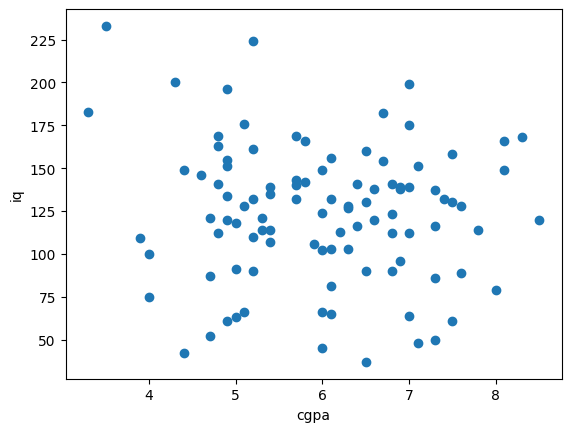

In [63]:
plt.scatter(new_df['cgpa'],new_df['iq'])
plt.xlabel('cgpa')
plt.ylabel('iq')

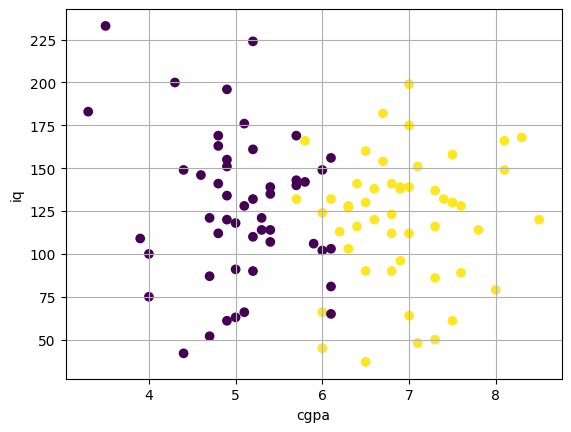

In [64]:
#color coding where the placement is
plt.scatter(new_df['cgpa'],df['iq'],c=new_df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.grid()

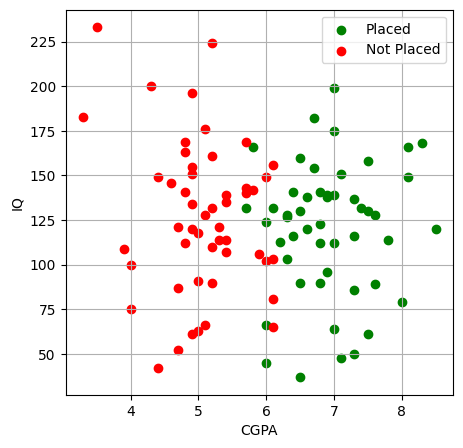

In [65]:

#making it more better to understand and color coded
plt.figure(figsize=(5, 5))
plt.scatter(new_df[new_df.placement == 1]['cgpa'], new_df[new_df.placement == 1]['iq'], color='green', label='Placed')
plt.scatter(new_df[new_df.placement == 0]['cgpa'], new_df[new_df.placement == 0]['iq'], color='red', label='Not Placed')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.grid(True)

From the EDA we understand that we can do classification. And here we can use Logistic regression algorithm

*Feature selection and extracting input output cols*

In here cgpa and iq is independent colum

Placement is dependent column(The result of placement depends on cgpa and iq)

In [66]:
X=new_df.iloc[:,0:2]
X #2d tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [67]:
Y = new_df.iloc[:,-1]
Y #1d tensor

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


*Train test split*

In [68]:
from sklearn.model_selection import train_test_split

random_state=2 ensures that the data is split into the training and testing sets in the exact same way each time its execute that line of code.

In [70]:
train_test_split(X,Y,test_size=0.2,random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [71]:
X_train

,cgpa,iq
35,6.8,90.0
11,6.9,138.0
84,5.7,169.0
44,7.5,61.0
73,4.9,61.0
...,...,...
43,6.8,141.0
22,4.9,120.0
72,7.3,116.0
15,5.1,176.0


In [72]:
X_test

,cgpa,iq
83,7.5,130.0
30,7.6,128.0
56,6.1,65.0
24,4.7,121.0
16,5.2,224.0
23,4.7,87.0
2,5.3,121.0
27,6.0,124.0
28,5.2,90.0
13,6.4,116.0


Scaling the data.Data transfrom  0 to 1

In [73]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.72430457, -0.82086527],
       [ 0.80939174,  0.33545264],
       [-0.21165435,  1.0822413 ],
       [ 1.31991479, -1.51947401],
       [-0.89235174, -1.51947401],
       [ 0.97956609, -1.83264344],
       [-0.80726456, -0.79677531],
       [ 1.14974044, -1.78446353],
       [ 0.6392174 ,  0.72089195],
       [ 0.04360718, -0.53178579],
       [ 1.83043783,  1.00997143],
       [-0.04148   , -0.43542596],
       [-1.65813631, -0.5799657 ],
       [ 0.55413022,  0.33545264],
       [-0.21165435,  0.38363256],
       [ 0.12869435, -1.03767488],
       [-0.21165435,  0.45590243],
       [-0.89235174,  0.64862208],
       [ 1.31991479,  0.81725178],
       [ 0.04360718, -1.90491331],
       [-0.46691587,  0.3595426 ],
       [ 2.00061218,  1.05815134],
       [-0.21165435,  0.19091291],
       [ 0.38395587,  0.40772251],
       [-1.40287478,  1.82902995],
       [ 0.89447892,  0.3595426 ],
       [-0.63709022,  0.19091291],
       [ 0.89447892,  1.80493999],
       [ 0.80939174,

In [76]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.31991479e+00,  1.42732992e-01],
       [ 1.40500196e+00,  9.45530794e-02],
       [ 1.28694351e-01, -1.42311418e+00],
       [-1.06252609e+00, -7.40766163e-02],
       [-6.37090216e-01,  2.40718891e+00],
       [-1.06252609e+00, -8.93135138e-01],
       [-5.52003042e-01, -7.40766163e-02],
       [ 4.36071767e-02, -1.80674674e-03],
       [-6.37090216e-01, -8.20865269e-01],
       [ 3.83955873e-01, -1.94526399e-01],
       [ 2.13781525e-01, -2.66796269e-01],
       [-6.37090216e-01, -3.39066138e-01],
       [-8.92351738e-01,  7.44981906e-01],
       [ 1.28694351e-01, -5.07695834e-01],
       [ 7.24304569e-01, -2.58967033e-02],
       [ 9.79566092e-01,  6.48622079e-01],
       [ 1.23482761e+00,  1.90912905e-01],
       [ 8.94478918e-01, -2.90886225e-01],
       [ 1.14974044e+00,  3.11362688e-01],
       [ 4.69043047e-01, -8.20865269e-01]])

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()



In [80]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [84]:

y_pred = clf.predict(X_test) #model predicted this
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [83]:
Y_test

,placement
83,1
30,1
56,0
24,0
16,0
23,0
2,0
27,1
28,0
13,1


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


0.9

decision boundary: What type of pattern the model saw in the data we can visualize it.

<Axes: >

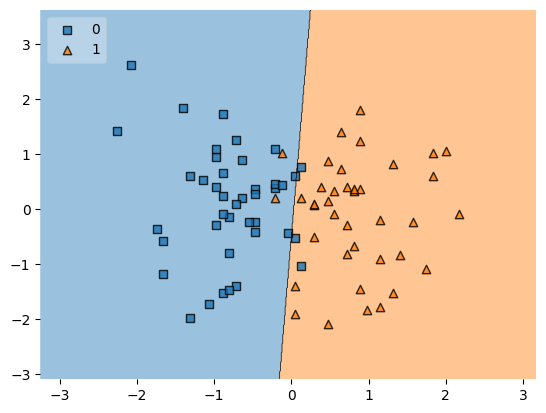

In [89]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [92]:
#It converts it to file so we can deploy in a website
import pickle
pickle.dump(clf,open('model.pkl','wb'))